In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
ss = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
print(ss.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [ ]:
ss.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
ss.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [ ]:
ss.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
missInColumns = ['Teacher_Quality','Parental_Education_Level','Distance_from_Home']

In [ ]:
for col in missInColumns:
  ss[col].fillna(ss[col].mode()[0], inplace=True)

/tmp/ipython-input-1068977309.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ss[col].fillna(ss[col].mode()[0], inplace=True)


In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
ss.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
ss.duplicated().sum()

np.int64(0)

# EDA

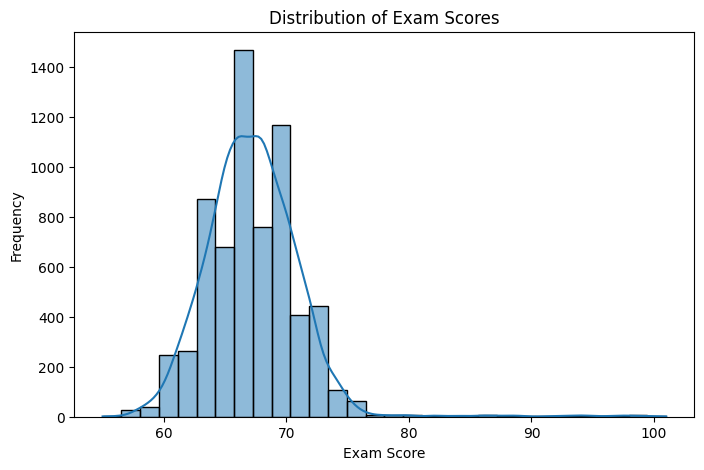

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(ss['Exam_Score'], bins=30, kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print(ss.dtypes)


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


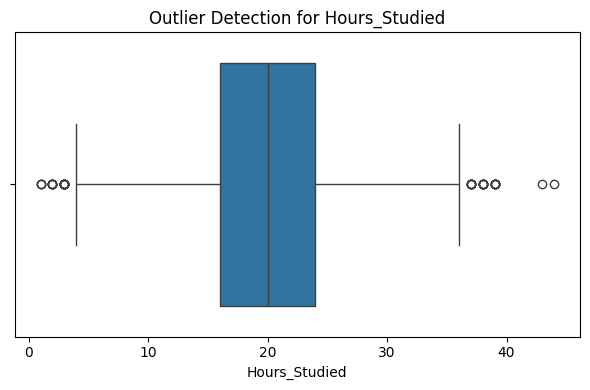

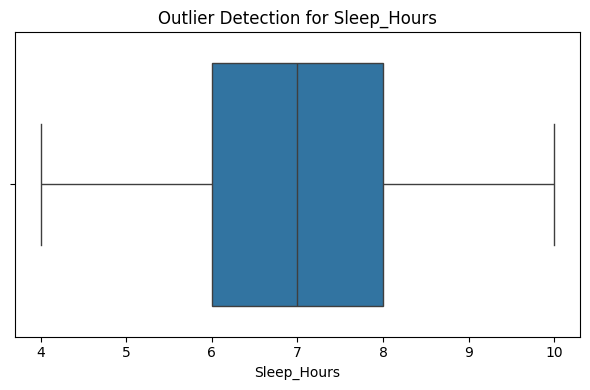

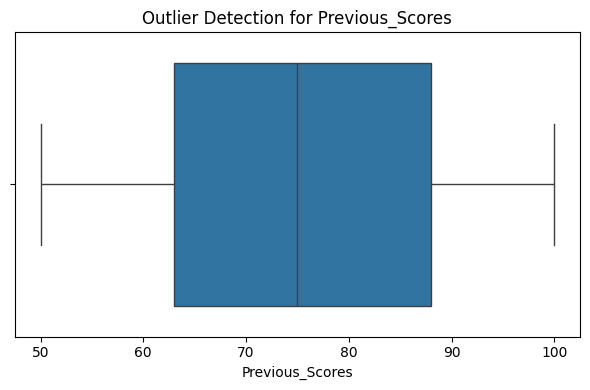

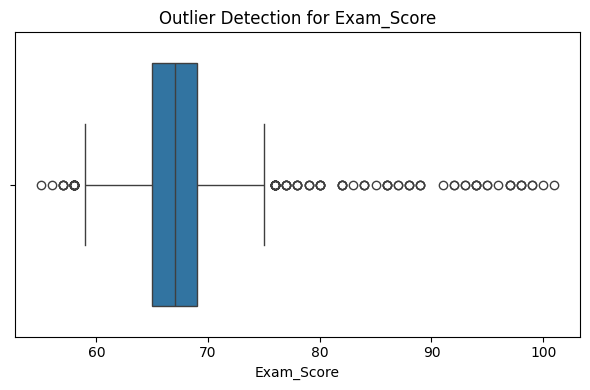

In [ ]:
numeric_cols = ['Hours_Studied', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=ss[col])
    plt.title(f"Outlier Detection for {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
print( ss.shape[0])
ss.drop_duplicates(inplace=True)
print( ss.shape[0])


6607
6607


In [ ]:
ss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
ss['Exam_Score'] = ss['Exam_Score'].clip(upper=100)


In [ ]:
ss.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235508
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.889161
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,100.000000


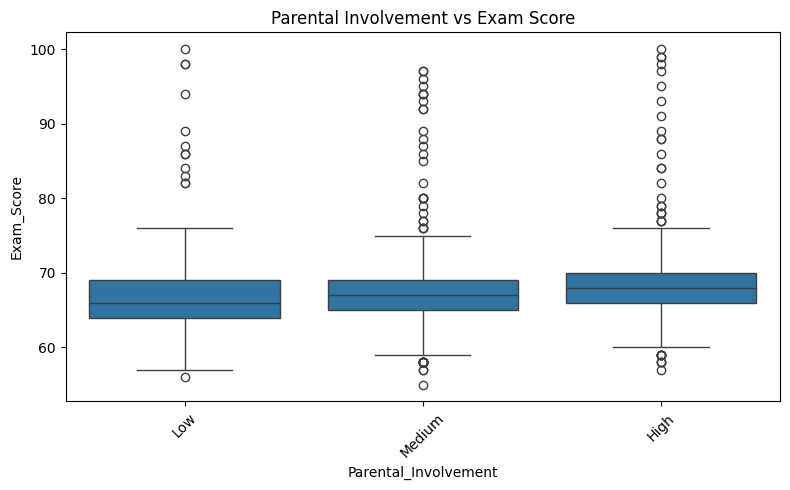

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=ss)
plt.title("Parental Involvement vs Exam Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


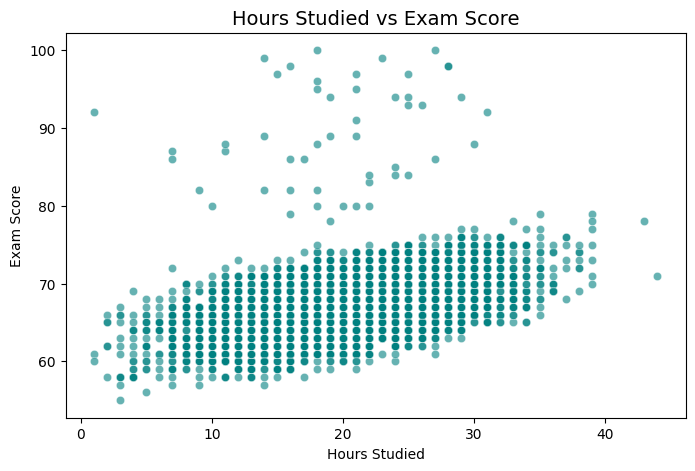

In [ ]:
plt.figure(figsize=(8,5))

sns.scatterplot(
    x='Hours_Studied',
    y='Exam_Score',
    data=ss,
    color="teal",
    alpha=0.6
)

plt.title("Hours Studied vs Exam Score", fontsize=14)
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")

plt.show()




/tmp/ipython-input-1227670614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=ss, palette="Set2")


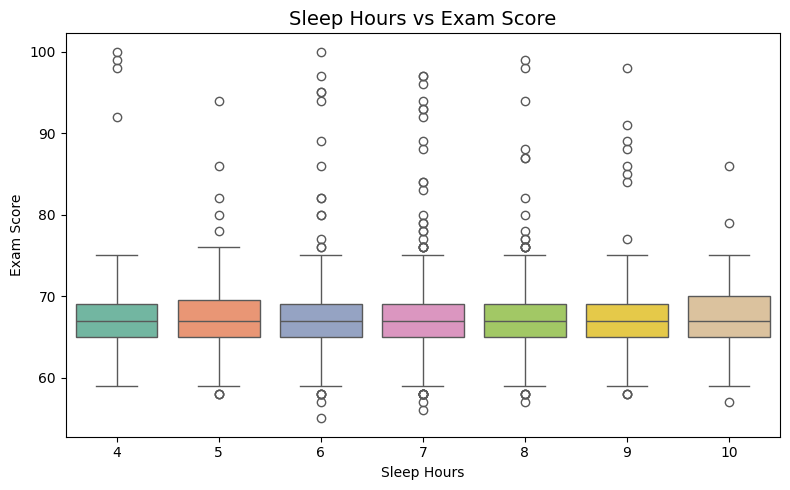

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=ss, palette="Set2")

plt.title("Sleep Hours vs Exam Score", fontsize=14)
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()




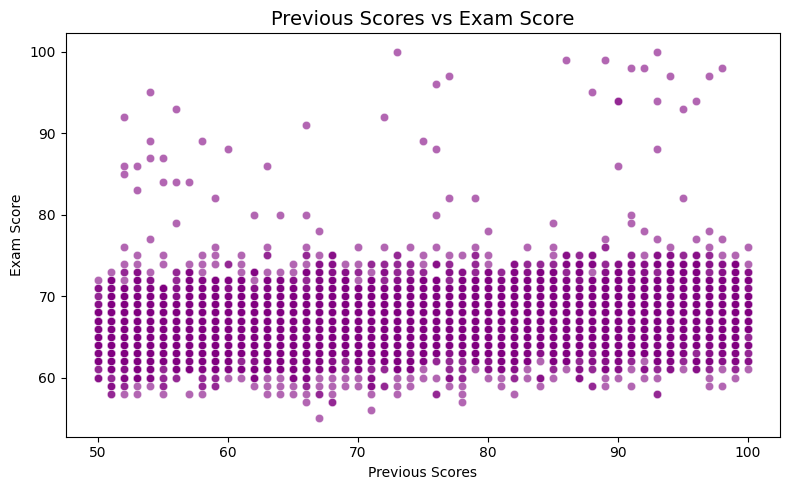

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Previous_Scores", y="Exam_Score", data=ss, color="purple", alpha=0.6)
plt.title("Previous Scores vs Exam Score", fontsize=14)
plt.xlabel("Previous Scores")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

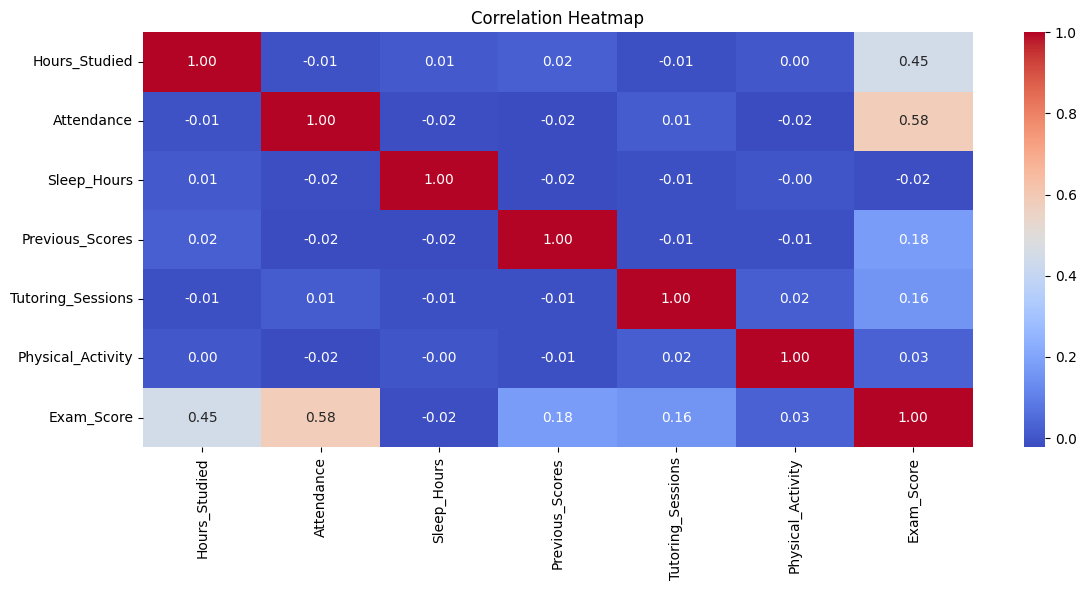

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(ss.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Data spliting

In [ ]:
ss_encoded = pd.get_dummies(ss, drop_first=True)

print(ss_encoded.shape)

(6607, 28)


In [ ]:
from sklearn.preprocessing import StandardScaler


numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                'Tutoring_Sessions', 'Physical_Activity']

scaler = StandardScaler()


ss_encoded[numeric_cols] = scaler.fit_transform(ss_encoded[numeric_cols])


print(ss_encoded[numeric_cols].head())


   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0       0.504942    0.348375    -0.019796        -0.143800          -1.213934   
1      -0.162822   -1.383736     0.661399        -1.116110           0.411451   
2       0.671882    1.560853    -0.019796         1.106313           0.411451   
3       1.506587    0.781403     0.661399         1.592469          -0.401242   
4      -0.162822    1.041220    -0.700990        -0.699406           1.224144   

   Physical_Activity  
0           0.031411  
1           1.001199  
2           1.001199  
3           1.001199  
4           1.001199  


In [ ]:
print(ss_encoded.columns.tolist())


['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low', 'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'School_Type_Public', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near', 'Gender_Male']


In [ ]:
corr = ss_encoded.corr(numeric_only=True)
corr_with_exam_score = corr["Exam_Score"].sort_values(ascending=False)
print(corr_with_exam_score)

Exam_Score                               1.000000
Attendance                               0.581205
Hours_Studied                            0.445558
Previous_Scores                          0.175089
Tutoring_Sessions                        0.156466
Parental_Education_Level_Postgraduate    0.093815
Peer_Influence_Positive                  0.081196
Distance_from_Home_Near                  0.081008
Extracurricular_Activities_Yes           0.064371
Internet_Access_Yes                      0.051628
Physical_Activity                        0.027832
Motivation_Level_Medium                  0.024819
Family_Income_Medium                     0.021034
Gender_Male                             -0.001988
Peer_Influence_Neutral                  -0.007767
School_Type_Public                      -0.008872
Sleep_Hours                             -0.017000
Access_to_Resources_Medium              -0.026205
Parental_Involvement_Medium             -0.035950
Teacher_Quality_Low                     -0.041193


In [ ]:
x = ss_encoded.drop(["Exam_Score", "Previous_Scores"  ,"Parental_Education_Level_Postgraduate"], axis=1)
y = ss_encoded["Exam_Score"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

print(x_train.shape, x_test.shape)

(4955, 25) (1652, 25)


# Modeling


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 3.44
Root Mean Squared Error: 1.86
R² Score: 0.75


In [ ]:
y_pred[:10]


array([63.89948005, 64.1615736 , 72.32950888, 64.01981789, 65.50515903,
       66.2048379 , 72.70403671, 67.7512178 , 69.7944531 , 70.12005103])

In [ ]:
y_test[:10]

,Exam_Score
743,65
5551,65
3442,71
6571,64
4204,66
2516,66
4047,72
1706,66
1075,70
233,70


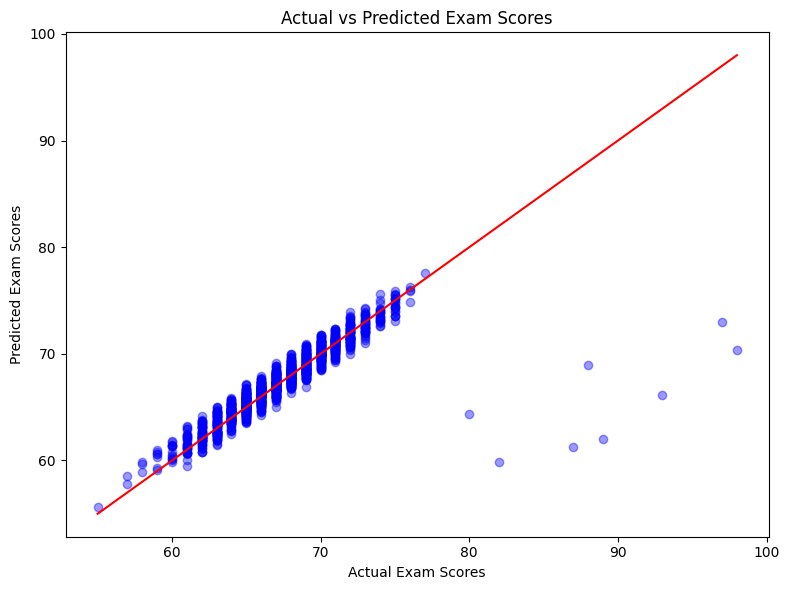

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred,   color="blue",alpha = 0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.tight_layout()
plt.show()


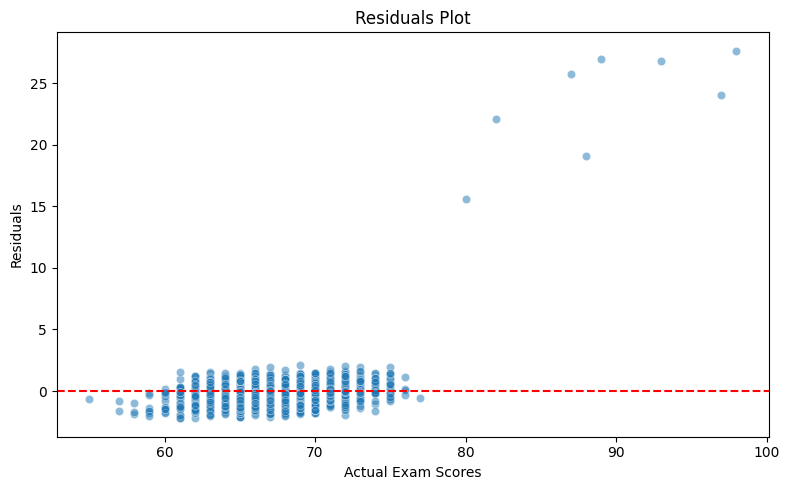

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.tight_layout()
plt.show()


# **Bonus section**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=1, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

print(x_train_poly.shape)


(4955, 25)


In [ ]:
lr_poly = LinearRegression()
lr_poly.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred_poly = lr_poly.predict(x_test_poly)
y_pred_poly[:10]

array([63.89948005, 64.1615736 , 72.32950888, 64.01981789, 65.50515903,
       66.2048379 , 72.70403671, 67.7512178 , 69.7944531 , 70.12005103])

In [ ]:
y_test[:10]

,Exam_Score
743,65
5551,65
3442,71
6571,64
4204,66
2516,66
4047,72
1706,66
1075,70
233,70


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_poly)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_poly)

print("Random Forest Results:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

Random Forest Results:
Mean Squared Error: 3.44
Root Mean Squared Error: 1.86
R² Score: 0.75


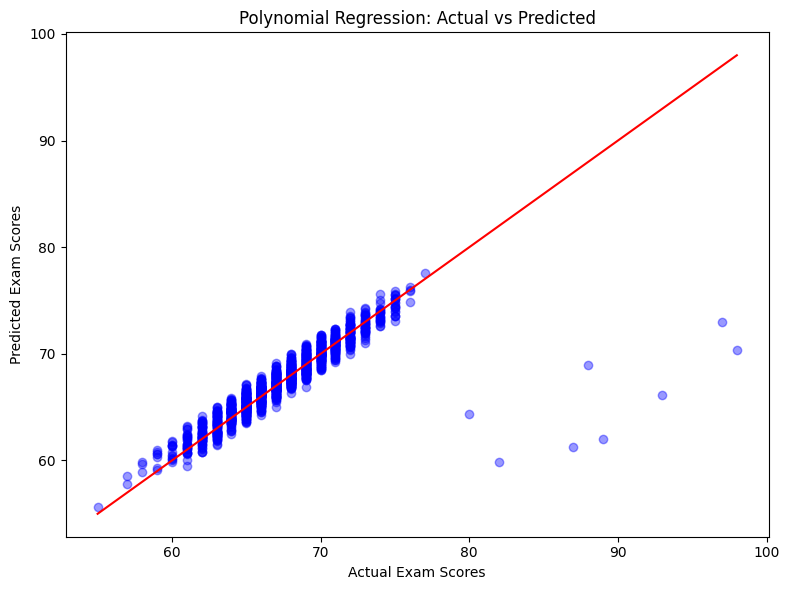

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, color="blue", alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

===== Model Comparison =====
Metric                    Linear Regression    Polynomial Regression
-----------------------------------------------------------------
Mean Squared Error        3.44                 3.44                
Root Mean Squared Error   1.86                 1.86                
R² Score                  0.75                 0.75                


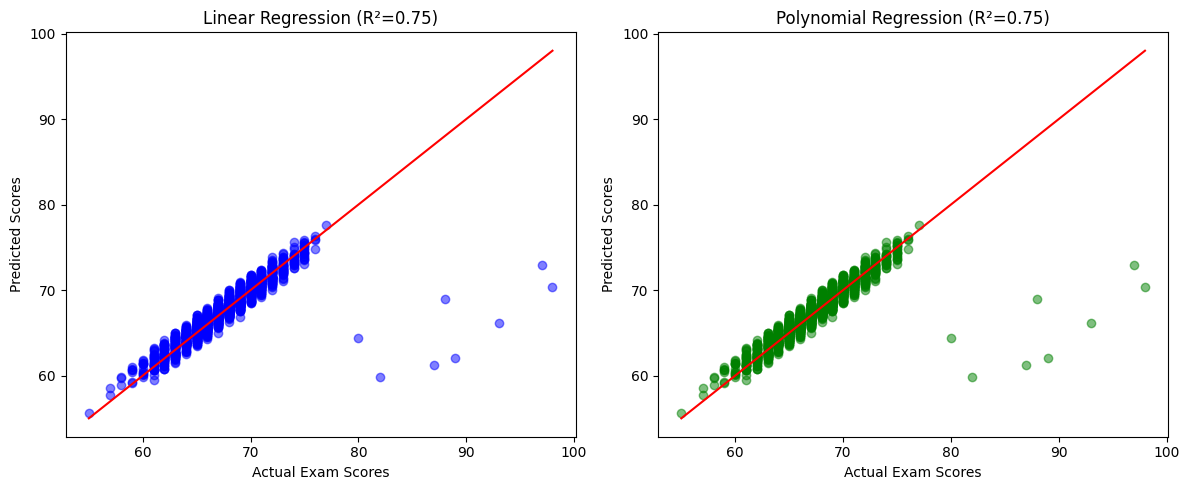

In [ ]:
print("===== Model Comparison =====")
print(f"{'Metric':<25} {'Linear Regression':<20} {'Polynomial Regression':<20}")
print("-"*65)
print(f"{'Mean Squared Error':<25} {mse:<20.2f} {mse_rf:<20.2f}")
print(f"{'Root Mean Squared Error':<25} {rmse:<20.2f} {rmse_rf:<20.2f}")
print(f"{'R² Score':<25} {r2:<20.2f} {r2_rf:<20.2f}")


plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Scores")
plt.title(f"Linear Regression (R²={r2:.2f})")


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color="green", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="-")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Scores")
plt.title(f"Polynomial Regression (R²={r2_rf:.2f})")

plt.tight_layout()
plt.show()

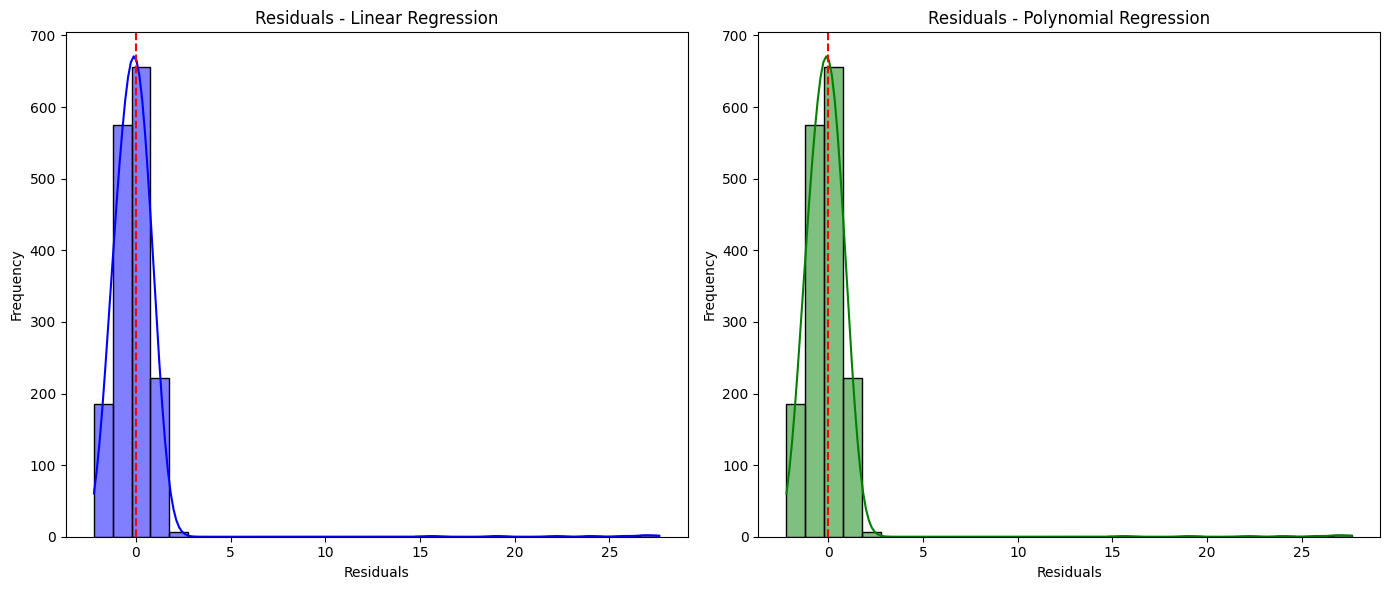

In [ ]:
residuals_lr = y_test - y_pred
residuals_poly = y_test - y_pred_poly

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True, color="blue", bins=30)
plt.axvline(0, color="red", linestyle="--")
plt.title("Residuals - Linear Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(residuals_poly, kde=True, color="green", bins=30)
plt.axvline(0, color="red", linestyle="--")
plt.title("Residuals - Polynomial Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
feature_sets = {
    "All Features": list(x_train.columns),
    "Without Sleep": [col for col in x_train.columns if col != 'Sleep_Hours'],
    "Without Participation": [col for col in x_train.columns if col != 'Extracurricular_Activities_Yes'],
    "Only Sleep & Participation": ['Sleep_Hours', 'Extracurricular_Activities_Yes'],
    "Without Sleep & Participation": [col for col in x_train.columns if col not in ['Sleep_Hours', 'Extracurricular_Activities_Yes']]
}

results = []

In [ ]:
for name, features in feature_sets.items():

  X_train_fs = x_train[features]
  X_test_fs = x_test[features]

  model = LinearRegression()
  model.fit(X_train_fs, y_train)

  y_pred_fs = model.predict(X_test_fs)

  r2 = r2_score(y_test, y_pred_fs)
  mse = mean_squared_error(y_test, y_pred_fs)
  rmse = np.sqrt(mse)
  results.append({
        "Feature_Set": name,
        "R² Score": r2,
        "MSE": mse,
        "RMSE": rmse
    })


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                     Feature_Set  R² Score        MSE      RMSE
0                   All Features  0.747290   3.442034  1.855272
1                  Without Sleep  0.747653   3.437096  1.853941
2          Without Participation  0.742216   3.511149  1.873806
3     Only Sleep & Participation  0.000866  13.608703  3.688997
4  Without Sleep & Participation  0.742582   3.506163  1.872475
